In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option("display.max_columns",None)

In [5]:
data = pd.read_csv("/content/wine_quality.csv")

In [6]:
df = data.copy()

# Missing Values

In [7]:
for feature in df.columns:
  print(f"{feature}: {df[feature].isnull().sum()}")

Unnamed: 0: 0
fixed acidity: 0
volatile acidity: 0
citric acid: 0
residual sugar: 0
chlorides: 0
free sulfur dioxide: 0
total sulfur dioxide: 0
density: 0
pH: 0
sulphates: 0
alcohol: 0
quality: 0


**features from dataset does not contains any null values**

#outlier detection

<Axes: >

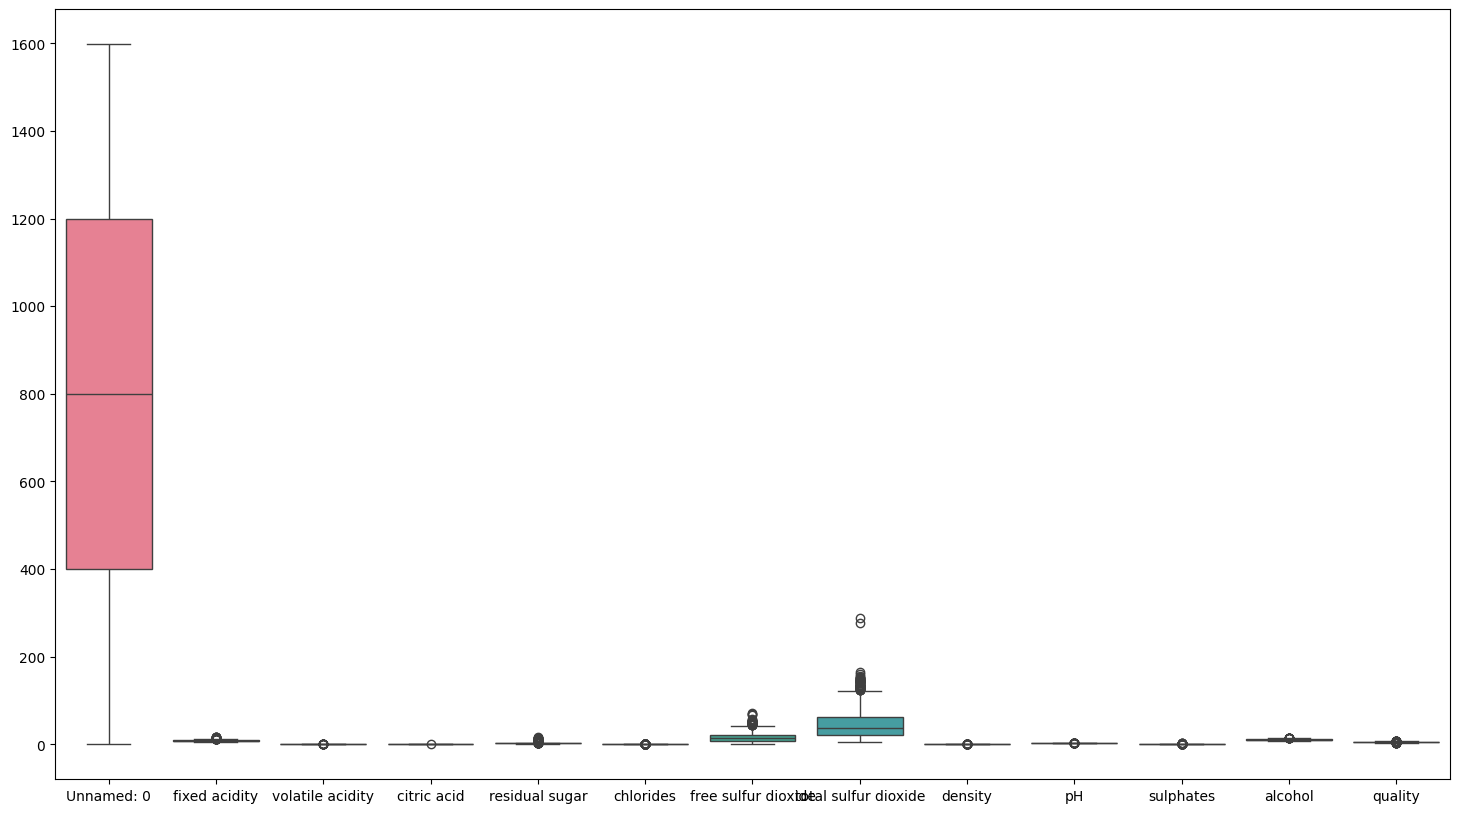

In [8]:
plt.figure(figsize=(18,10))
sns.boxplot(df)

**each feature contains the outliers**

#outliers removal

In [9]:
df.columns

Index(['Unnamed: 0', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [10]:
def outlier_detection(feature):
  sns.boxplot(df[feature])
  plt.show()
  print()
  sns.kdeplot(df[feature])
  plt.show()
  print(f"skewness: {df[feature].skew()}")

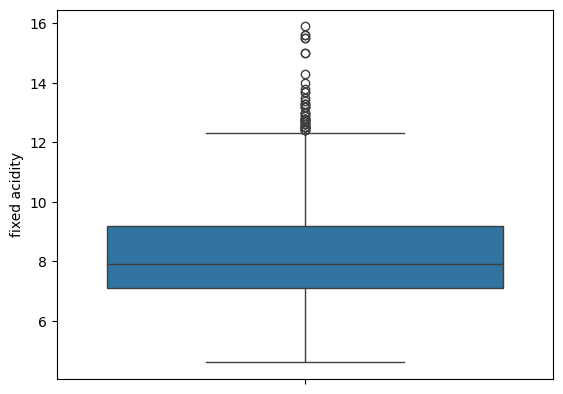

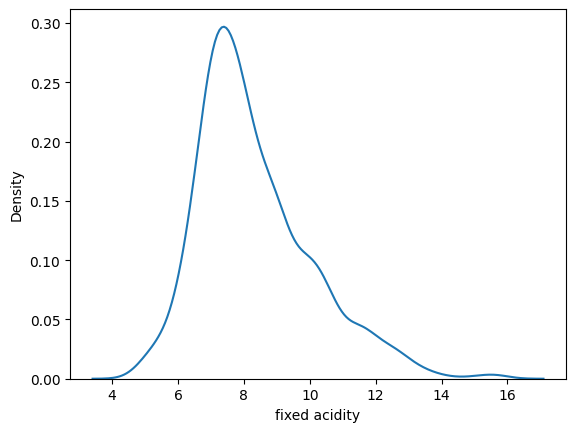

skewness: 0.9827514413284587


In [11]:
outlier_detection("fixed acidity")

In [12]:
q1 = df["fixed acidity"].quantile(0.25)
q3 = df["fixed acidity"].quantile(0.75)
iqr = q3-q1
upper_limit = q3+(1.5*iqr)
lower_limit = q1-(1.5*iqr)
print(upper_limit,"\n",lower_limit)

12.349999999999998 
 3.95


In [13]:
df.loc[df["fixed acidity"] > upper_limit,"fixed acidity"] = upper_limit
df.loc[df["fixed acidity"] < lower_limit,"fixed acidity"] = lower_limit

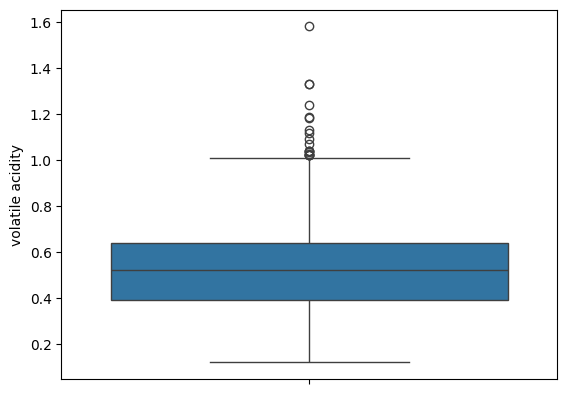

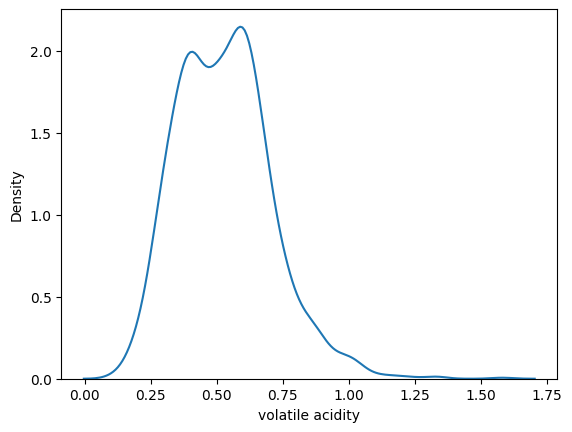

skewness: 0.6715925723840199


In [16]:
outlier_detection("volatile acidity")

In [18]:
q1 = df["volatile acidity"].quantile(0.25)
q3 = df["volatile acidity"].quantile(0.75)
IQR = q3-q1
upper_limit = q3 + (IQR*1.5)
lower_limit = q1 - (IQR*1.5)
print(upper_limit,"\n",lower_limit)

1.0150000000000001 
 0.015000000000000013


In [19]:
df.loc[df["volatile acidity"] >= upper_limit,"volatile acidity"] = upper_limit
df.loc[df["volatile acidity"] <= lower_limit,"volatile acidity"] = lower_limit

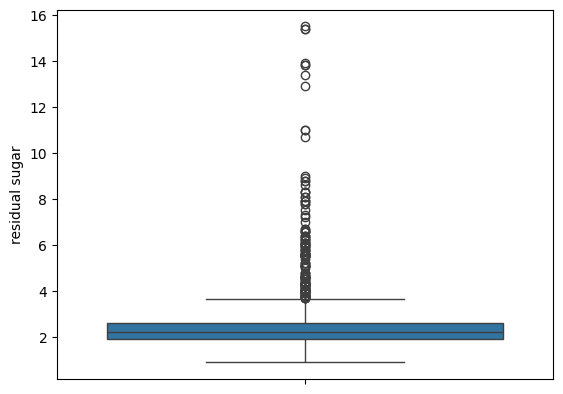

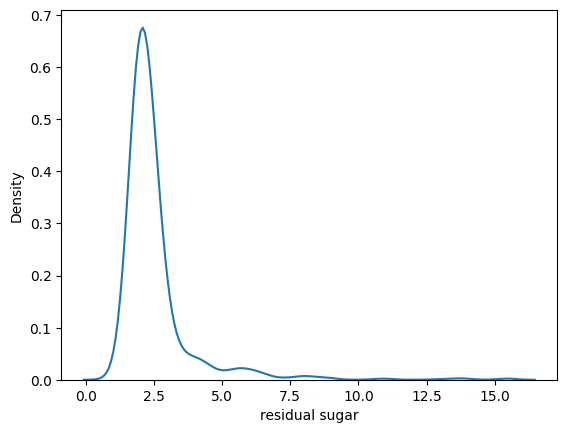

skewness: 4.54065542590319


In [22]:
outlier_detection("residual sugar")

In [23]:
q1 = df["residual sugar"].quantile(0.25)
q3 = df["residual sugar"].quantile(0.75)
IQR = q3-q1
upper_limit = q3 + (IQR*1.5)
lower_limit = q1 - (IQR*1.5)
print(upper_limit,"\n",lower_limit)

3.6500000000000004 
 0.8499999999999996


In [24]:
df.loc[df["residual sugar"]>= upper_limit,"residual sugar"] = upper_limit
df.loc[df["residual sugar"]<= lower_limit,"residual sugar"] = lower_limit

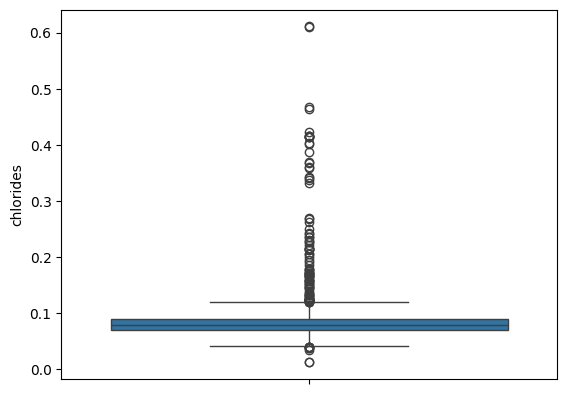

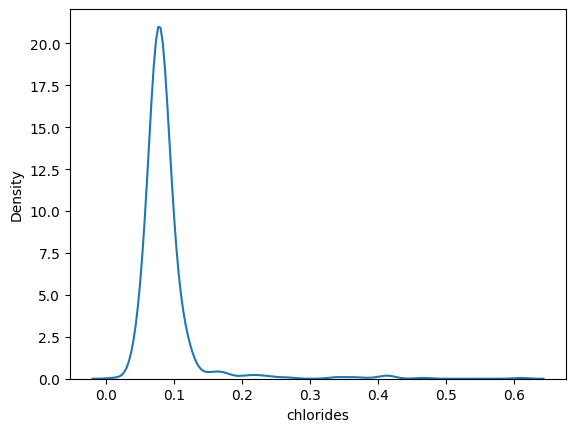

skewness: 5.680346571971724


In [26]:
outlier_detection("chlorides")

In [27]:
def outlier_removal(feature):
  q1 = df[feature].quantile(0.25)
  q3 = df[feature].quantile(0.75)
  IQR = q3-q1
  upper_limit = q3 + (IQR*1.5)
  lower_limit = q1 - (IQR*1.5)
  print(upper_limit,"\n",lower_limit)
  df.loc[df[feature]>= upper_limit,feature] = upper_limit
  df.loc[df[feature]<= lower_limit,feature] = lower_limit

In [28]:
outlier_removal("chlorides")

0.11999999999999998 
 0.04000000000000002


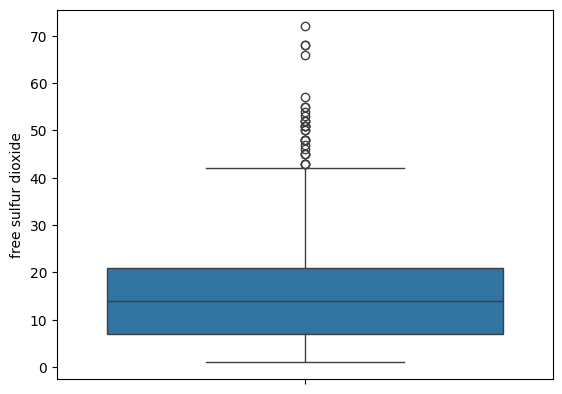

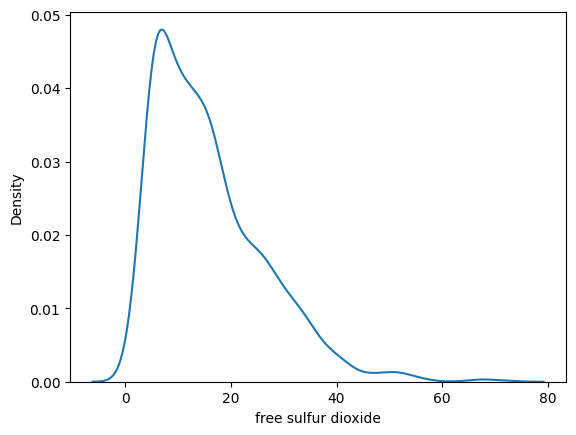

skewness: 1.250567293314441


In [30]:
outlier_detection("free sulfur dioxide")

In [31]:
outlier_removal("free sulfur dioxide")

42.0 
 -14.0


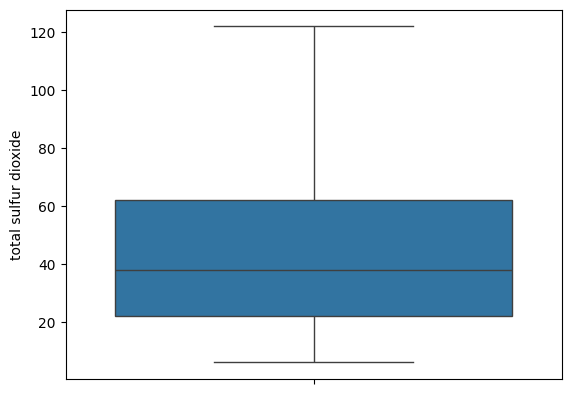

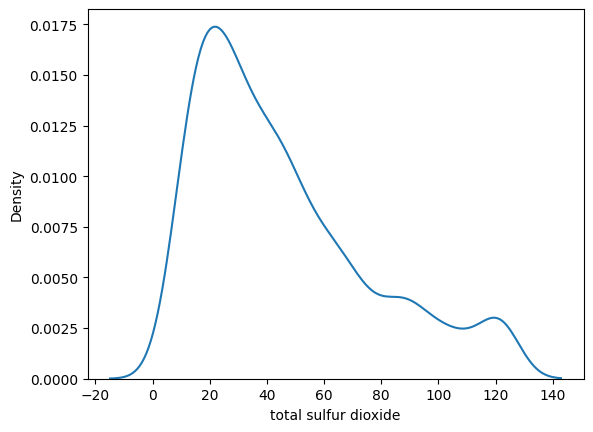

skewness: 0.9726424367173526


In [34]:
outlier_detection("total sulfur dioxide")

In [35]:
outlier_removal("total sulfur dioxide")

122.0 
 -38.0


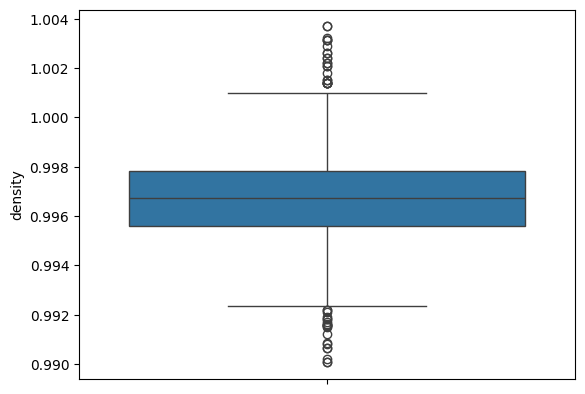

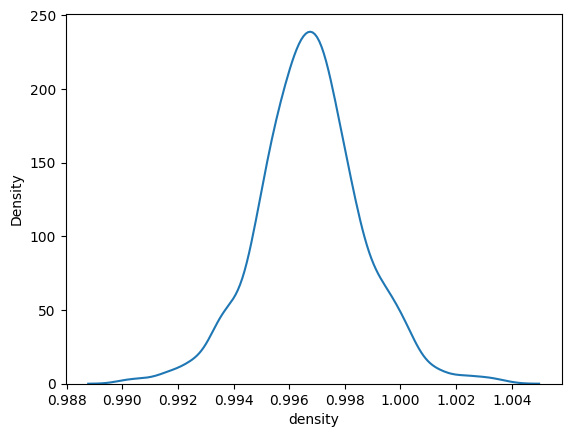

skewness: 0.07128766294927483


In [37]:
outlier_detection("density")

In [41]:
upper_limit = df["density"].mean() + (3*df["density"].std())
lower_limit = df["density"].mean() - (3*df["density"].std())
print(upper_limit,"\n",lower_limit)

1.0023415572553134 
 0.9911491347179033


In [42]:
df.loc[df["density"]>upper_limit,"density"] = upper_limit
df.loc[df["density"]<lower_limit,"density"]=lower_limit

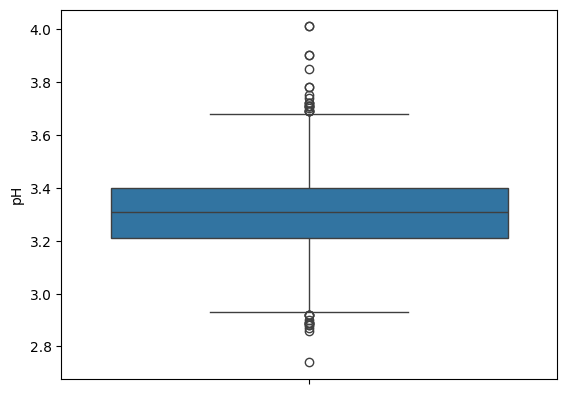

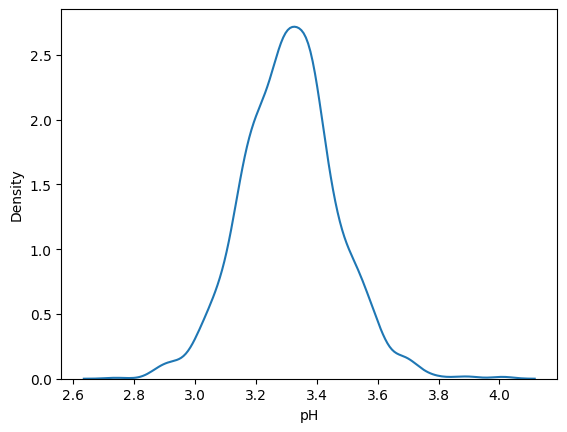

skewness: 0.19368349811284427


In [44]:
outlier_detection("pH")

In [45]:
outlier_removal("pH")

3.6849999999999996 
 2.925


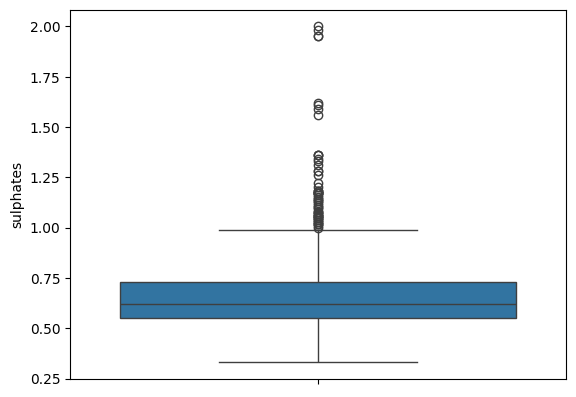

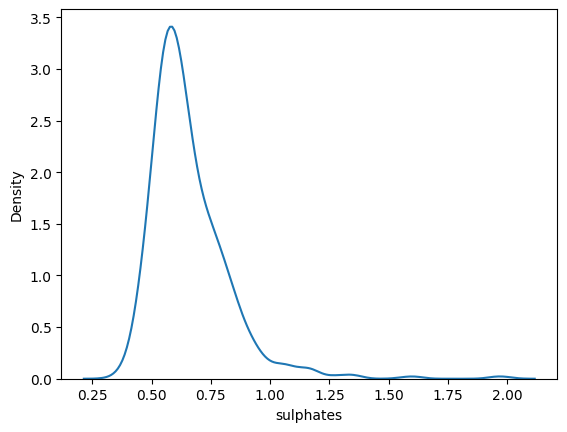

skewness: 2.4286723536602945


In [47]:
outlier_detection("sulphates")

In [48]:
outlier_removal("sulphates")

0.9999999999999999 
 0.28000000000000014


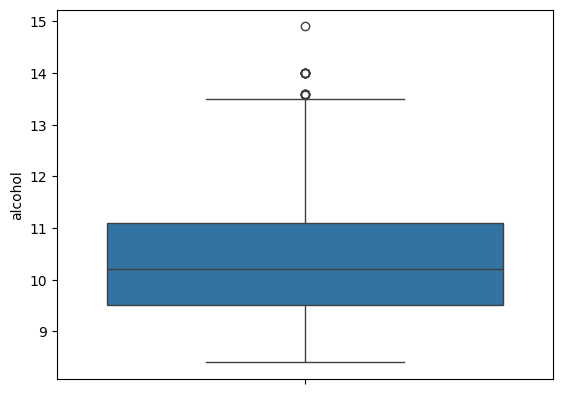

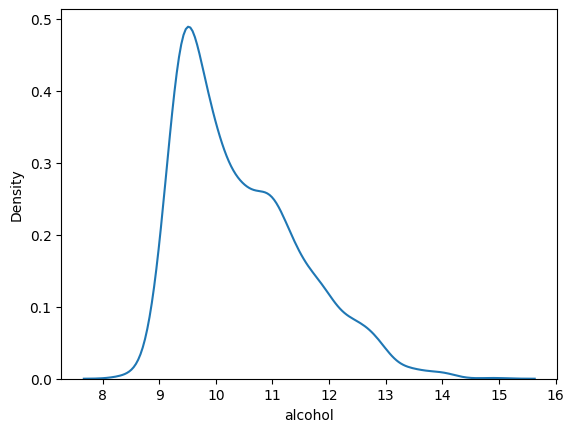

skewness: 0.8608288068888538


In [50]:
outlier_detection("alcohol")

In [51]:
outlier_removal("alcohol")

13.5 
 7.1000000000000005


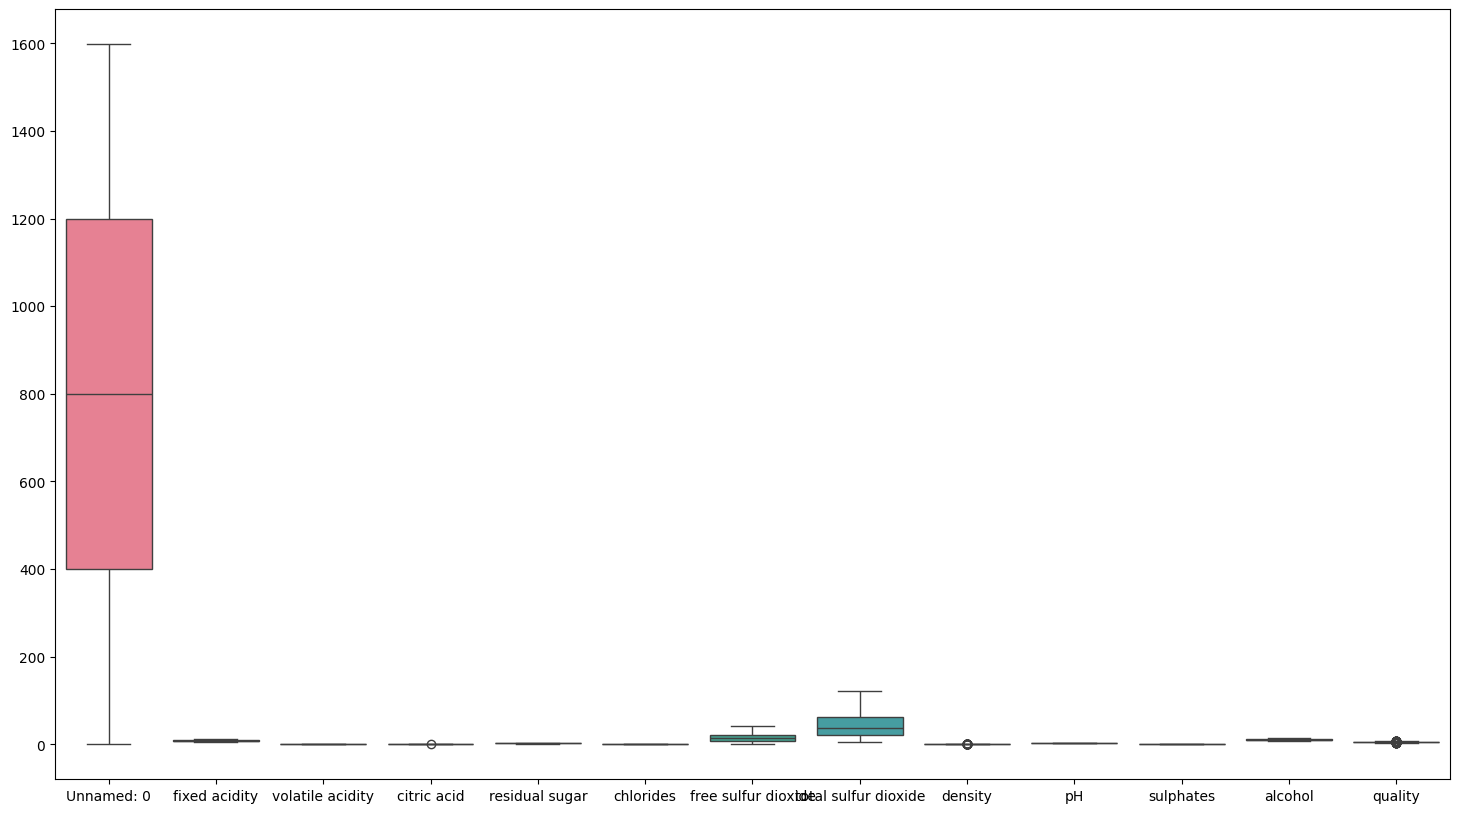

In [53]:
plt.figure(figsize=(18,10))
sns.boxplot(df)
plt.show()

**outliers from the most of the features are removed**

##feature scaling

In [62]:
def distrubution(feature):

  sns.kdeplot(df[feature])
  plt.show()
  print(df[feature].skew())

In [66]:
right_skewed = [feature for feature in df.columns if df[feature].skew()>0.1]

In [67]:
right_skewed

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'sulphates',
 'alcohol',
 'quality']

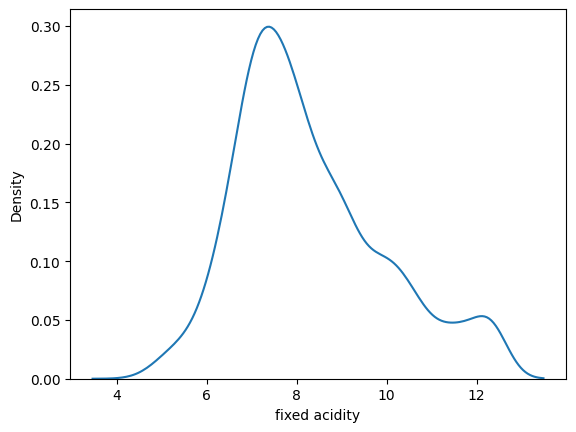

0.700362867672385


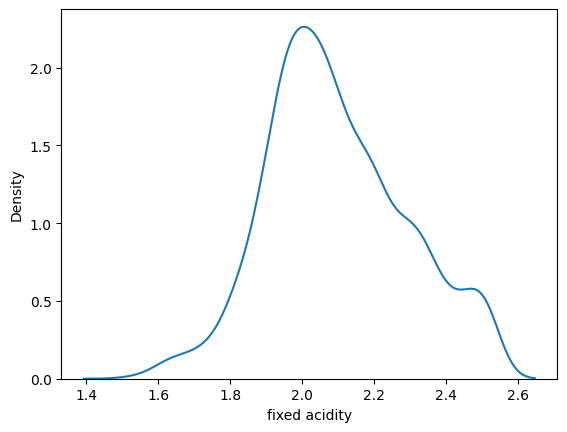

0.2469737851549287


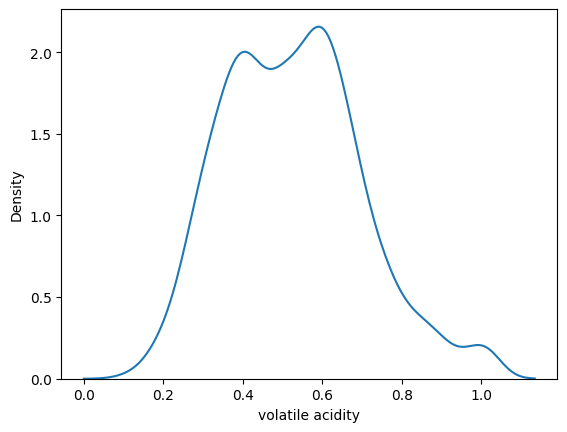

0.4209282756327551


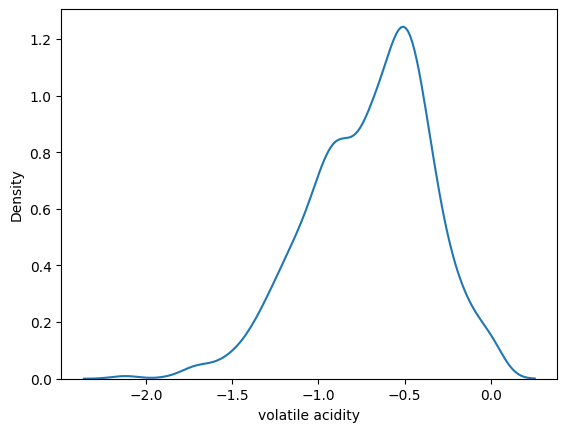

-0.4939946812656488


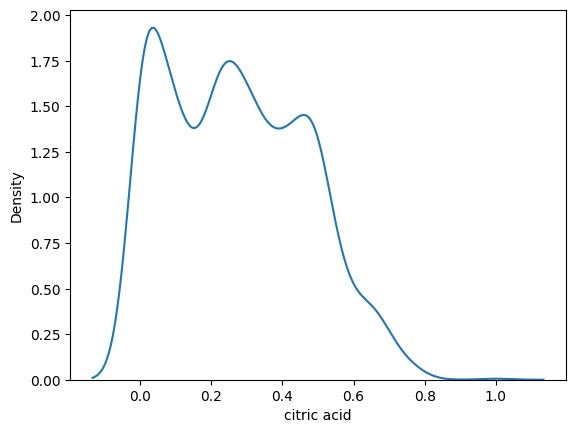

0.3183372952546368


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


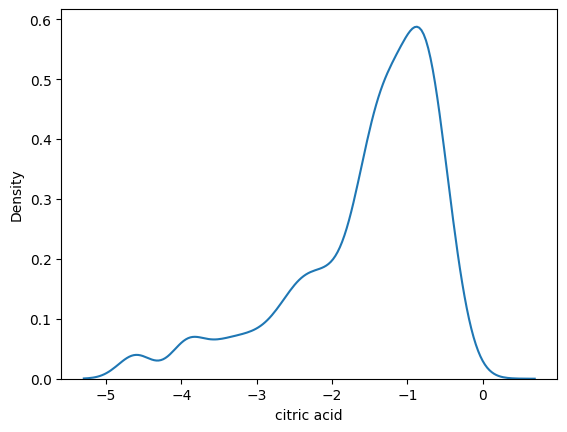

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1248: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


nan


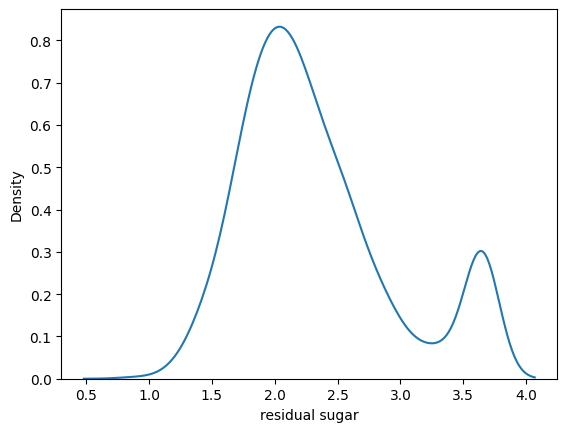

0.8566820659014789


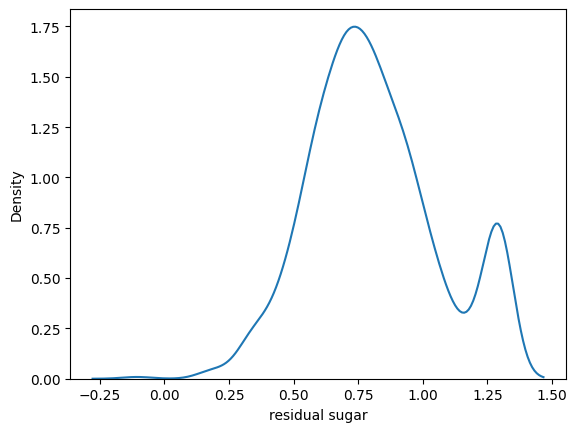

0.2832339687484062


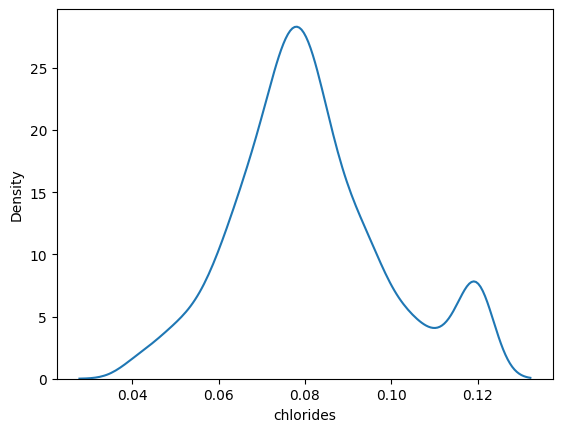

0.4316828650325734


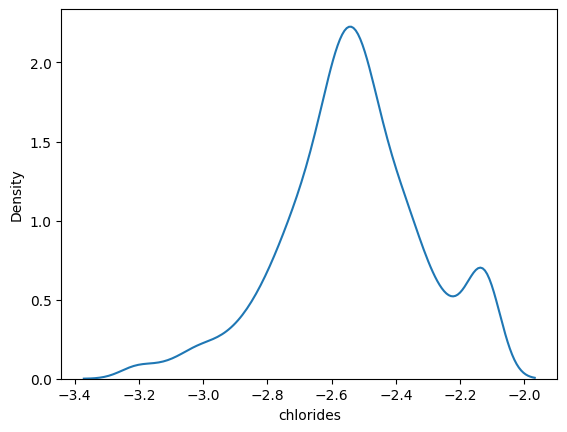

-0.2537300672069984


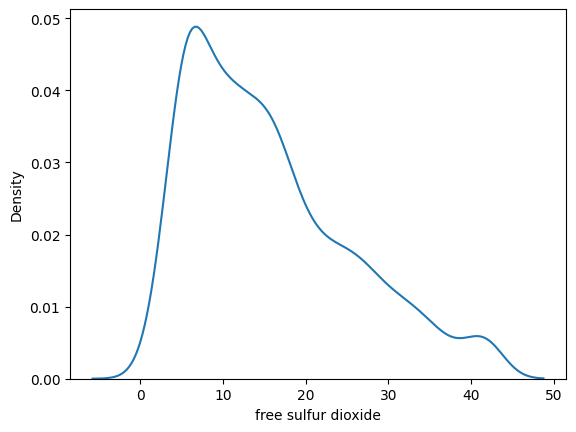

0.8589670838118362


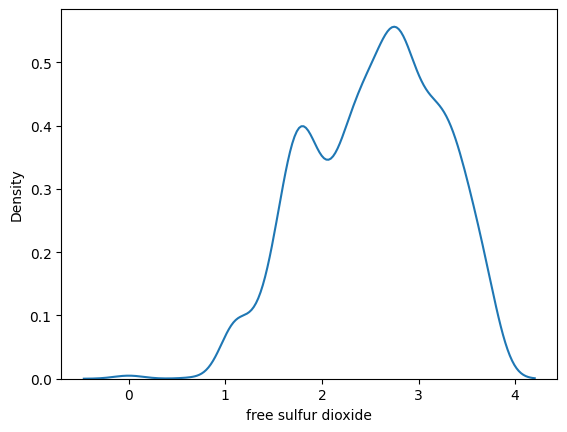

-0.29105300730804046


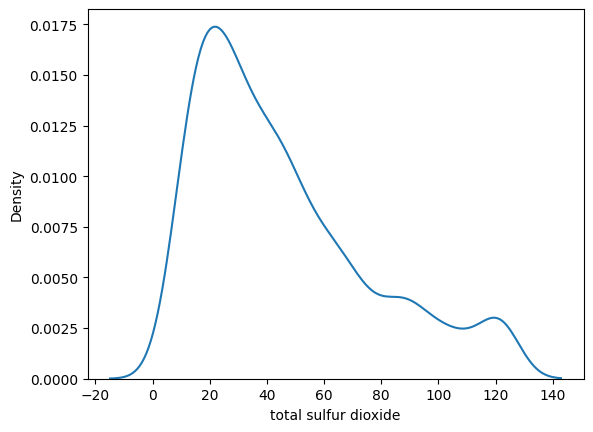

0.9726424367173526


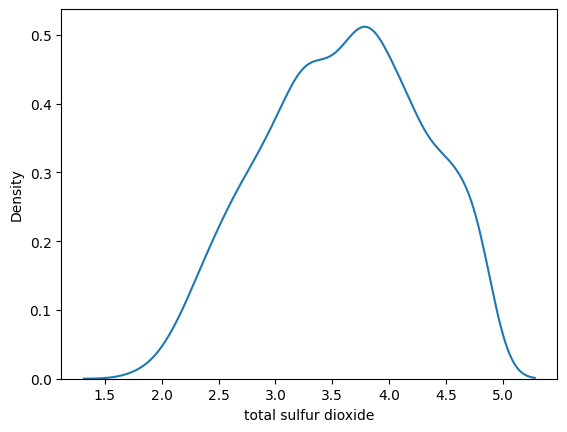

-0.14731199037920906


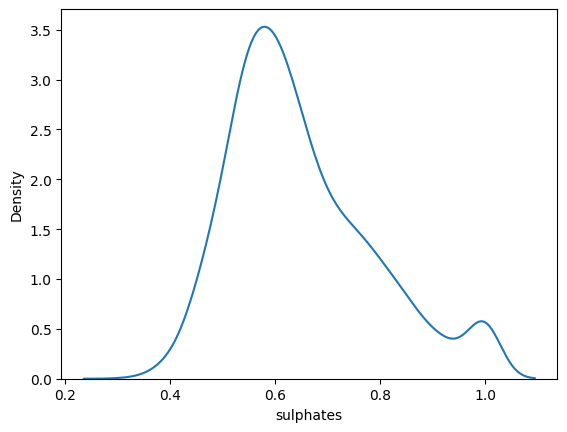

0.7827869842108781


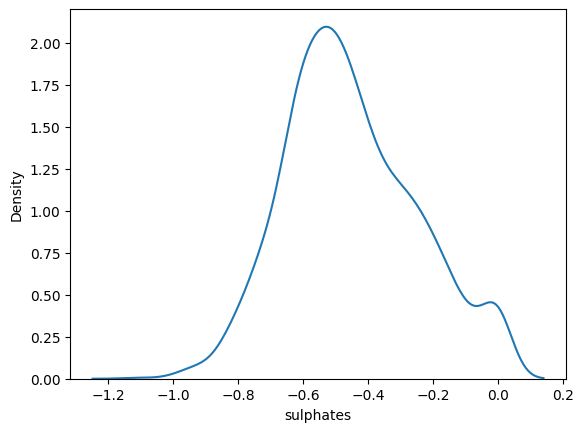

0.30857834798785316


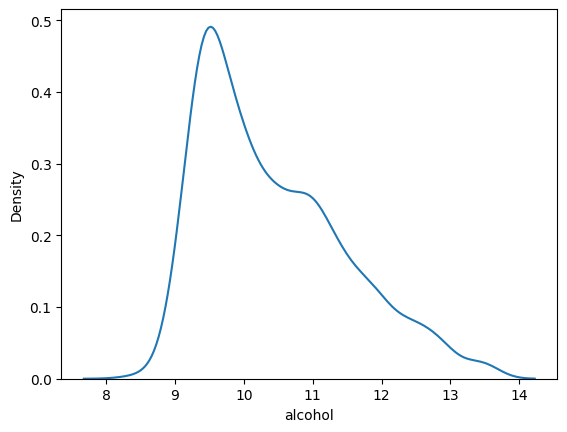

0.7954292038101095


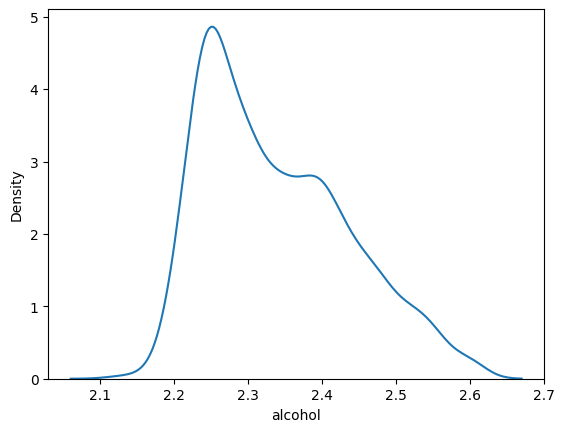

0.6192961410994049


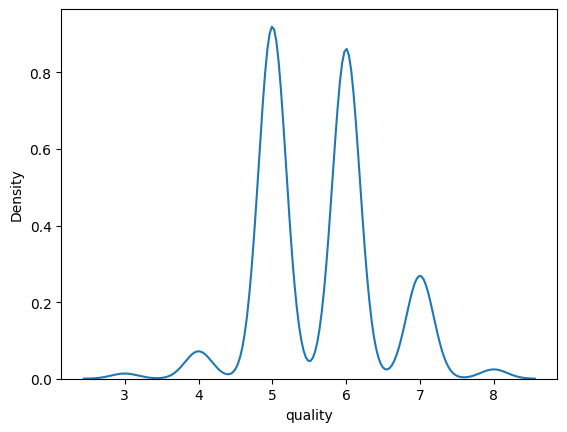

0.21780157547366327


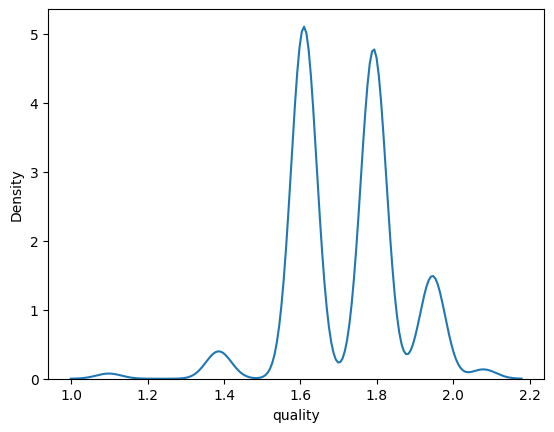

-0.3652111314954099


In [68]:
for feature in right_skewed:
  distrubution(feature)
  log_feature = np.log(df[feature])
  df[feature] = log_feature
  distrubution(feature)

In [69]:
df.to_csv("wine_quality_cleaned.csv",index=False)